<a href="https://colab.research.google.com/github/Hemanth9336/DDos-Attacks-Using-ML-Techniques-Comparitive-Analysis/blob/main/accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



In [ ]:
# fetch the training file
file_path_20_percent = '/content/drive/MyDrive/kdd/KDDTrain+_20Percent.txt'
file_path_full_training_set = '/content/drive/MyDrive/kdd/KDDTrain+.txt'
file_path_test = '/content/drive/MyDrive/kdd/KDDTest+.txt' 

df = pd.read_csv(file_path_20_percent)
df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)

In [ ]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])
#  add columns names to dataframe
df.columns = columns

#  to change attack feature to numeric type
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
df['attack_flag'] = is_attack
print(df.head())

   duration protocol_type  service  ...   attack  level  attack_flag
0         0           udp    other  ...   normal     15            0
1         0           tcp  private  ...  neptune     19            1
2         0           tcp     http  ...   normal     21            0
3         0           tcp     http  ...   normal     21            0
4         0           tcp  private  ...  neptune     21            1

[5 rows x 44 columns]


In [ ]:
#  to encode non-numeric features 

features_to_encode = ['protocol_type', 'service', 'flag']
encoded = pd.get_dummies(df[features_to_encode])
print(encoded.head())
#  names of selected numeric features 
numeric_features = ['duration', 'src_bytes', 'dst_bytes','count','serror_rate','srv_serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate']
to_fit = encoded.join(df[numeric_features]) ## joining numeric and non numeric features 

detected = df['attack_flag']  # taking output column

# splitting data into test and validation(test) set 
train_X, val_X, train_y, val_y = train_test_split(to_fit, detected, test_size=0.6)

   protocol_type_icmp  protocol_type_tcp  ...  flag_SF  flag_SH
0                   0                  0  ...        1        0
1                   0                  1  ...        0        0
2                   0                  1  ...        1        0
3                   0                  1  ...        1        0
4                   0                  1  ...        0        0

[5 rows x 84 columns]


In [ ]:
# model to implement and to calculate accuracy
models = [
    RandomForestClassifier(),
    LogisticRegression(max_iter=250),
    KNeighborsClassifier(),
]
model_comps = [] # to save accuracy at each validation stage for each model 

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, train_X, train_y, scoring='accuracy')
    for count, accuracy in enumerate(accuracies):
        model_comps.append((model_name, count, accuracy))
# Printing accuracies 
for i in model_comps:
  print(i)

('RandomForestClassifier', 0, 0.9978170271879341)
('RandomForestClassifier', 1, 0.9983131573724946)
('RandomForestClassifier', 2, 0.9987100615201429)
('RandomForestClassifier', 3, 0.997816810558698)
('RandomForestClassifier', 4, 0.9992061129304356)
('LogisticRegression', 0, 0.46824766818813257)
('LogisticRegression', 1, 0.46824766818813257)
('LogisticRegression', 2, 0.46834689422504466)
('LogisticRegression', 3, 0.46849260692666467)
('LogisticRegression', 4, 0.5295226753994244)
('KNeighborsClassifier', 0, 0.9938479857114507)
('KNeighborsClassifier', 1, 0.9937487596745386)
('KNeighborsClassifier', 2, 0.9954356023020441)
('KNeighborsClassifier', 3, 0.9942443187456584)
('KNeighborsClassifier', 4, 0.9948397340478317)


In [ ]:
#LogisticRegression Model 
clf = LogisticRegression(max_iter=250)
clf = clf.fit(train_X, train_y)  
clf_predictions = clf.predict(val_X) 
clf_score = accuracy_score(clf_predictions,val_y)  
print("Testing accuracy is:", clf_score)

Testing accuracy is: 0.4635372565622354


[0.50225203 0.99038085 0.67180662 ... 0.54744952 0.89303122 0.50224706]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.835


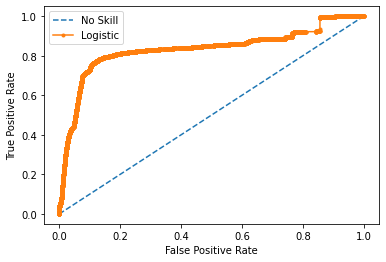

In [ ]:
#ROC curve
ns_probs = [0 for _ in range(len(val_y))] #array of 0's of lenght val_y
lr_probs = clf.predict_proba(val_X) #predicted values of val_x
# print(lr_probs)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1] 
print(lr_probs)
# calculate scores
ns_auc = roc_auc_score(val_y, ns_probs) #comparing
lr_auc = roc_auc_score(val_y, lr_probs) 
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(val_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(val_y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error

my_model = XGBRegressor(objective ='reg:logistic',gamma=0.001,eta=0.5,
                        reg_alpha=0,reg_lambda=0,ntrees=10,sample_rate=0.9,max_depth=9)
# my_model = XGBRegressor()
my_model = my_model.fit(train_X, train_y)

score = my_model.score(val_X,val_y)  
print("Testing accuracy is:", score)

Testing accuracy is: 0.9933180073688387
